<font size="5">Subsetting Monocle3 CellDataSet (CDS) object and rerunning monocle3</font>

The key issue is that when using Ni's codebase to rerun on a subsetted CDS object,  

Using Monocle3 env

In [1]:
library(monocle3)
library(tidyverse)
library(viridis)
library(grid)
source("~/sctkr/R/MonocleUtils.R")

data_root <- '/lustre/scratch126/cellgen/team205/nh3/skin'
proj_root <- '~/FCA_Fetal_Skin_priv'

run_monocle_cds <- function(cds, res=0.01, umap_n_neighbors=500L, umap_min_dist=0.3, use_partition=T,
                            learn_graph_control=list(minimal_branch_len=30, orthogonal_proj_tip=T)) {
    cds1 <- reduce_dimension(cds, umap.n_neighbors=umap_n_neighbors, umap.min_dist=umap_min_dist)
    cds1 <- cluster_cells(cds1, resolution=res)
    cds1 <- learn_graph(cds1, use_partition=use_partition, close_loop=T, learn_graph_control=learn_graph_control)
    cds1
}

Warning message:
“package ‘monocle3’ was built under R version 4.1.2”
Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to

[1] "sanger_id"                              
 [2] "chemistry"                              
 [3] "donor"                                  
 [4] "gender"                                 
 [5] "pcw"                                    
 [6] "sorting"                                
 [7] "sample"                                 
 [8] "chemistry_sorting"                      
 [9] "cell_caller"                            
[10] "scrublet_score"                         
[11] "cluster_scrublet_score"                 
[12] "doublet_pval"                           
[13] "bh_doublet_pval"                        
[14] "nCounts_RNA"                            
[15] "nFeaturess_RNA"                         
[16] "percent_mito"                           
[17] "percent_ribo"                           
[18] "percent_hb"                             
[19] "joint_annotation_20220202"              
[20] "independent_annotation_refined_20220202"
[21] "fig1b_annotation_20220202"              
[22] "joint_annot"                            
[23] "day"                                    
[24] "sample_id"                              
[25] "strain"                                 
[26] "version"                                
[27] "org_annot0"                             
[28] "org_annot0_prob"                        
[29] "org_annot30"                            
[30] "org_annot30_prob"                       
[31] "broad_annot"                            
[32] "dataset"                                
[33] "pcw_c"                                  
[34] "dataset_annot"                          
[35] "Size_Factor"


             Adipocytes       Dermal condensate         Dermal papillia 
                   2000                    2000                    2000 
         Early myocytes  FRZB+ early fibroblast HOXC5+ early fibroblast 
                    585                    2000                    2000 
      LMCD1+ mural cell              Mural cell               Myoblasts 
                   1000                     748                    1052 
               Myocytes          Myofibroblasts       PEAR1+ fibroblast 
                     53                    1000                    1000 
        PLN+ mural cell               Pericytes   Pre-dermal condensate 
                   1000                    1000                    2000 
       WNT2+ fibroblast 
                   2000 

In [31]:
###################
# 20220322 analysis
### FSK subset ####
fsk_cds <- readRDS(file.path(data_root, '20211022_final_figures', 'monocle', "pooled_fsk.mesenchymal.monocle.20220308.downsampled.rds"))
fsk_cds_sub <- fsk_cds[, fsk_cds$joint_annot != "Adipocytes"]

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


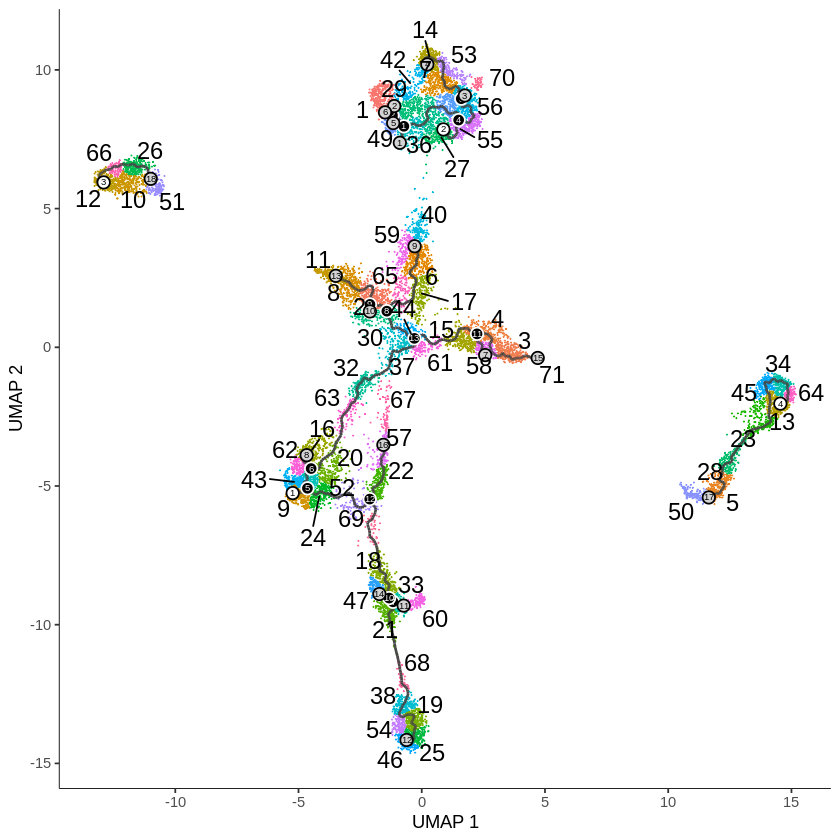

In [11]:
plot_cells(fsk_cds, group_label_size = 5)

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


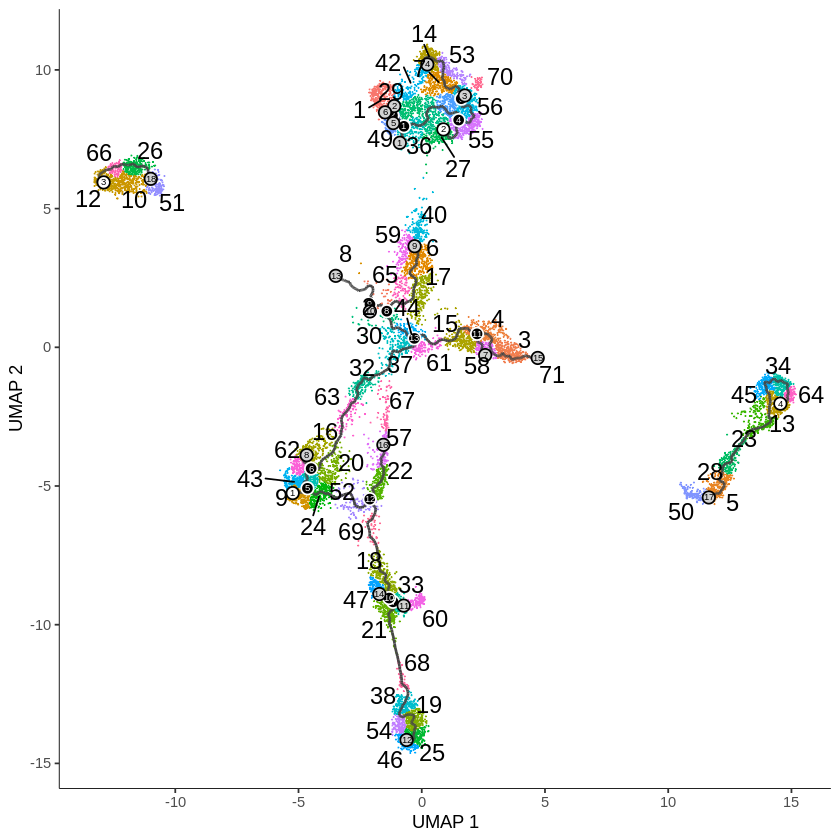

In [12]:
plot_cells(fsk_cds_sub, group_label_size = 5)

In [15]:
test_cds <- cluster_cells(fsk_cds_sub, reduction_method="UMAP")
test_cds

class: cell_data_set 
dim: 20320 12636 
metadata(2): cds_version citations
assays(1): counts
rownames(20320): AP006222.2 FAM87B ... AC240274.1 AC213203.1
rowData names(6): mito ribo ... cc gene_short_name
colnames(12636): ATCTACTCAAAGGTGC-1-4834STDY7002879-fsk
  CACATTTGTTAAAGTG-1-4834STDY7002879-fsk ...
  TTTGGTTCAAGTAGTA-1-FCAImmP7964510-fsk
  TTTGGTTTCTTGCAAG-1-FCAImmP7964510-fsk
colData names(36): sanger_id chemistry ... Size_Factor days
reducedDimNames(2): PCA UMAP
mainExpName: NULL
altExpNames(0):

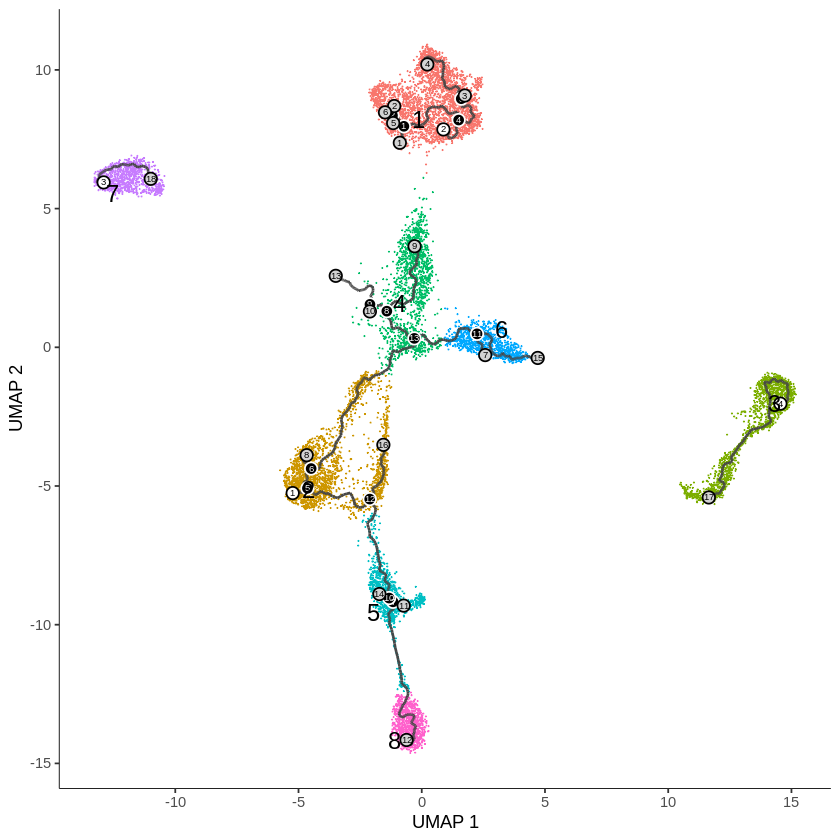

In [16]:
plot_cells(test_cds, group_label_size = 5)

In [17]:
test_cds <- learn_graph(test_cds)
test_cds

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


class: cell_data_set 
dim: 20320 12636 
metadata(2): cds_version citations
assays(1): counts
rownames(20320): AP006222.2 FAM87B ... AC240274.1 AC213203.1
rowData names(6): mito ribo ... cc gene_short_name
colnames(12636): ATCTACTCAAAGGTGC-1-4834STDY7002879-fsk
  CACATTTGTTAAAGTG-1-4834STDY7002879-fsk ...
  TTTGGTTCAAGTAGTA-1-FCAImmP7964510-fsk
  TTTGGTTTCTTGCAAG-1-FCAImmP7964510-fsk
colData names(36): sanger_id chemistry ... Size_Factor days
reducedDimNames(2): PCA UMAP
mainExpName: NULL
altExpNames(0):

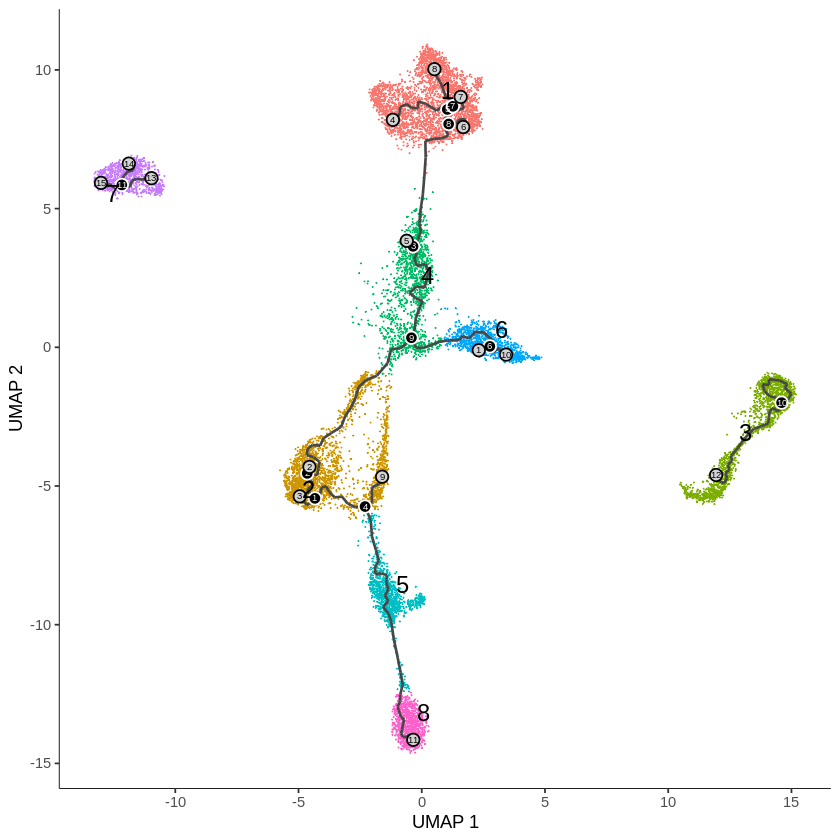

In [18]:
plot_cells(test_cds, group_label_size = 5)

In [19]:
test_cds2 <- choose_graph_segments(
  test_cds,
  starting_pr_node = get_principal_node(test_cds, "joint_annot", "HOXC5+ early fibroblast", node_type="any"),
  ending_pr_nodes = c(get_principal_node(test_cds, "joint_annot", "Dermal papillia", node_type="leaf"), 
#                       get_principal_node(ms_cds_list1[["fsk"]], "joint_annot", "Adipocytes", node_type="leaf"),
                      get_principal_node(test_cds, "joint_annot", "PEAR1+ fibroblast", node_type="leaf")),
  return_list=FALSE
)

In [21]:
embeds <- SimpleList()
embeds$PCA <- reducedDims(test_cds)$PCA[colnames(test_cds) %in% colnames(test_cds2), ]
embeds$UMAP <- reducedDims(test_cds)$UMAP[colnames(test_cds) %in% colnames(test_cds2), ]
reducedDims(test_cds2) <- embeds
rm(embeds)

In [24]:
test_cds2 <- run_monocle_cds(
    test_cds2, learn_graph_control = list(minimal_branch_len = 40, orthogonal_proj_tip = T)
)

No preprocess_method specified, using preprocess_method = 'PCA'



  |======================================================================| 100%


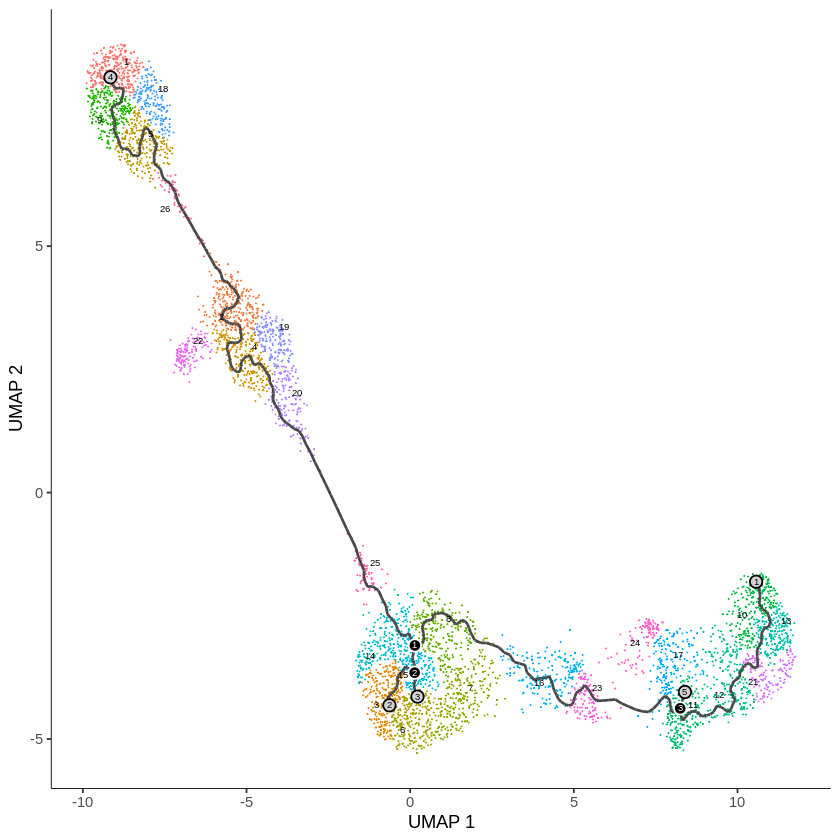

In [25]:
plot_cells(test_cds2)

In [26]:
(test_cds2_celltypes <- names(
  which(
    table(colData(test_cds2)$joint_annot) /
      sum(table(colData(test_cds2)$joint_annot)) >= 0.005
  )
))

[1] "Dermal condensate"       "Dermal papillia"        
[3] "HOXC5+ early fibroblast" "PEAR1+ fibroblast"      
[5] "Pre-dermal condensate"   "WNT2+ fibroblast"

In [28]:
test_cds2 <- test_cds2[, colData(test_cds2)$joint_annot %in% test_cds2_celltypes]
colData(test_cds2) <- droplevels(colData(test_cds2))

test_cds2 <- order_cells(
  test_cds2,
  root_pr_nodes = get_principal_node(
    test_cds2, 'joint_annot', "HOXC5+ early fibroblast", node_type = "leaf"
  )
)

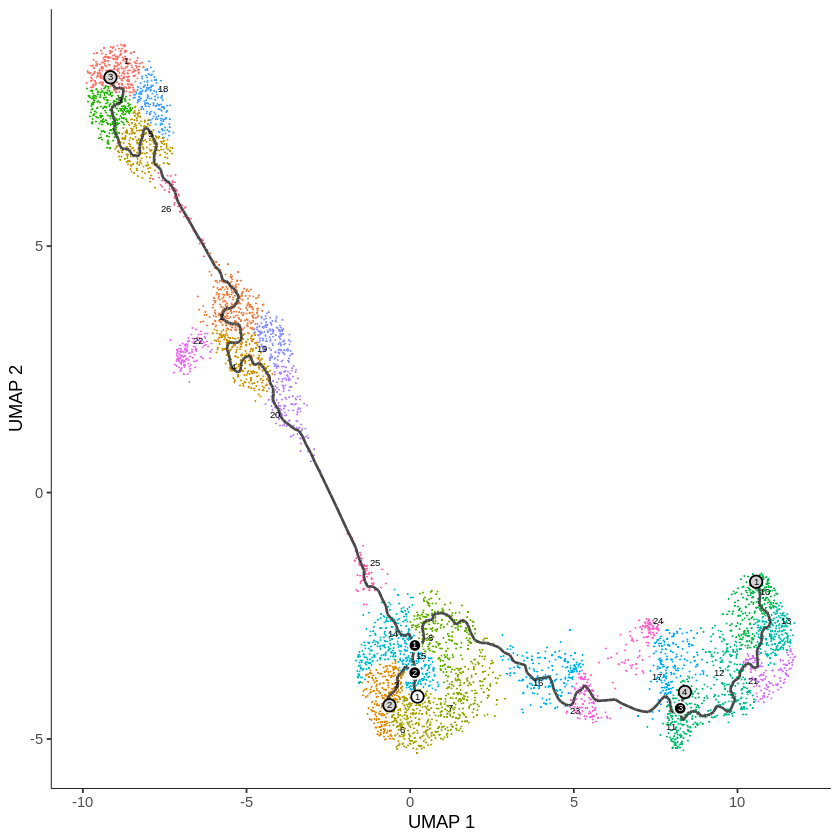

In [29]:
plot_cells(test_cds2)

In [30]:
ms_color_codes <- c(
  `HOXC5+ early fibroblast` = "#BB7784",
  `FRZB+ early fibroblast` = "#D6BDC1",
  `Pre-dermal condensate` = "#EAD3C7",
  `Dermal condensate` = "#7C87B9",
  `Dermal papillia` = "#BFC1D4",
  #`WNT2+ fibroblast` = "#4B67AF",
  `WNT2+ fibroblast` = "#29B8C9",
  `PEAR1+ fibroblast` = "#8794CA",
#   `Adipocytes` = "#154496",
  `Mural cell pericytes` = "#C7DFC7",
  `Myoblasts` = "#E6AFBA",
  `Early myocytes` = "#8F143E",
  `Myocytes` = "#E07B91"
)

ms_color_palette <- sapply(test_cds2_celltypes, function(ct) ms_color_codes[[ct]])

p0_pdf <- file.path(proj_root, "figures", "final", "pooled_fsk.mesenchymal_subset.monocle.20230112.pdf")
pdf(file = p0_pdf, width = 8, height = 6)
plot_trajectory(test_cds2, color_cells_by = "joint_annot", legend_loc = "right", label_graph_nodes = "root")
plot_trajectory(test_cds2, color_cells_by = "joint_annot", legend_loc = "right", label_graph_nodes = "root", color_palette = ms_color_palette)
plot_trajectory(test_cds2, color_cells_by = "pcw", legend_loc = "right", label_graph_nodes = "root")
plot_trajectory(test_cds2, color_cells_by = "pseudotime", legend_loc = "right", label_graph_nodes = "root")
#plot_trajectory(fsk_ms_cds2, color_cells_by = "joint_annot", legend_loc = "right", label_graph_nodes = "all")
dev.off()
#plot_trajectory(fsk_ms_cds2, color_cells_by = "joint_annot", legend_loc = "right", label_graph_nodes = "all")
dev.off()

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



png 
  2

null device 
          1